# <center> 1. Identify missing, incorrect and duplicate values

In [3]:
# library 
import pandas as pd

**1.1. Missing values**

In [4]:
#import dataset

df=pd.read_csv('cart.csv', parse_dates=['date'])
print(df)

        date    name  amount  price
0 2021-03-01  carrot     7.0   5.73
1 2021-03-01     egg    12.0   1.70
2 2021-03-01    milk     NaN   3.57
3 2021-03-01  potato     2.0    NaN
4        NaT  tomato     6.0   1.52
5 2021-03-02  potato     3.0   2.17
6 2021-03-03     NaN     5.0   3.68


In [3]:
# we can check the data type of each column
print(df.dtypes)

date      datetime64[ns]
name              object
amount           float64
price            float64
dtype: object


In [4]:
# we need to convert the amount column to integer
df['amount'].astype('Int32')

0       7
1      12
2    <NA>
3       2
4       6
5       3
6       5
Name: amount, dtype: Int32

In [5]:
# find missing values
df.isnull()

,date,name,amount,price
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,False,False,False
6,False,True,False,False


In [ ]:
# we can also sum the missing values
df.isnull().sum()

date      1
name      1
amount    1
price     1
dtype: int64

In [ ]:
# shows the rows with missing values
df.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5    False
6     True
dtype: bool

**1.2. Incorrect or Bad values**

It can be out of scale values such as a thousand degrees for our body temperature, maybe spelling mistakes, and others. 

In [6]:
# import library
import pandas as pd

Let's have a look at some metrics data. Here we have a CSV with time, name of the metric, and a value. Let's load it up. So we start by importing pandas as pd, and I'm going to hide the bar on the left side. And now, I'm going to read a CSV and parse the time column as date. And I'm going to sample 10 random rows. And we see some memory, some cpus, and some values.

In [7]:
# dataset
df=pd.read_csv('metrics.csv', parse_dates=['time'])
df.sample(10)

,time,name,value
1,2021-07-13 14:36:52.380,cpu,3.157000e+01
94,2021-07-13 14:37:37.359,cpu,3.733000e+01
67,2021-07-13 14:37:23.961,mem,2.275173e+08
18,2021-07-13 14:37:00.993,cpu,3.123000e+01
35,2021-07-13 14:37:08.649,mem,2.275387e+08
13,2021-07-13 14:36:58.122,cpu,3.233000e+01
44,2021-07-13 14:37:13.434,mem,2.275479e+08
42,2021-07-13 14:37:12.477,mem,2.275487e+08
54,2021-07-13 14:37:18.219,cpu,3.137000e+01
21,2021-07-13 14:37:01.950,mem,2.275199e+08


Let's use groupby to have a look at statistics per metric. So let's run the cell, groupby name and describe. And we see that the CPU has one count with the mean, and we see that minus 32.14 is probably an error for a metric value, either CPU or memory. 

In [9]:
# summary statistics by name
df.groupby('name').describe()

time                                                             \
     count                           mean                         min   
name                                                                    
CPU      1  2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000   
cpu     49  2021-07-13 14:37:16.168285696  2021-07-13 14:36:52.380000   
mem     50  2021-07-13 14:37:15.826500096  2021-07-13 14:36:52.380000   

                                                                    \
                                25%                            50%   
name                                                                 
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000064   
cpu   2021-07-13 14:37:04.820999936  2021-07-13 14:37:16.304999936   
mem   2021-07-13 14:37:04.103249920  2021-07-13 14:37:15.826499840   

                                                                     value  \
                                75%                         max  std count   
name                                                                         
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000  NaN   1.0   
cpu   2021-07-13 14:37:27.788999936  2021-07-13 14:37:39.273000  NaN  49.0   
mem   2021-07-13 14:37:27.549750016  2021-07-13 14:37:39.273000  NaN  50.0   

                                                                      \
              mean     min           25%           50%           75%   
name                                                                   
CPU   3.040000e+01   30.40  3.040000e+01  3.040000e+01  3.040000e+01   
cpu   3.645633e+01  -32.14  2.956000e+01  3.157000e+01  3.507000e+01   
mem   2.229711e+08  295.00  2.275070e+08  2.275188e+08  2.275342e+08   

                                 
              max           std  
name                             
CPU          30.4           NaN  
cpu         300.9  3.977927e+01  
mem   227556054.0  3.217637e+07

The value count method is a great way to find problems in categorical data such as the name. So let's run df name, values count. And we say we have 50 of memory, but 49 of cpu with a lowercase, and a single CPU with the uppercase. 

In [ ]:
# value counts checks categorical variables
df['name'].value_counts()

# here, CPU name is incorrect

name
mem    50
cpu    49
CPU     1
Name: count, dtype: int64

Some people find it easier to spot bad values on a chart. I'm going to pivot the DataFrame where the index is the time, the columns are going to be the name, and I'm going to plot with subplots equal True. And here we see the CPU with uppercase, cpu with lowercase, values, and the memory. And we see that the cpu is going below the zero, which is a problem. 

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

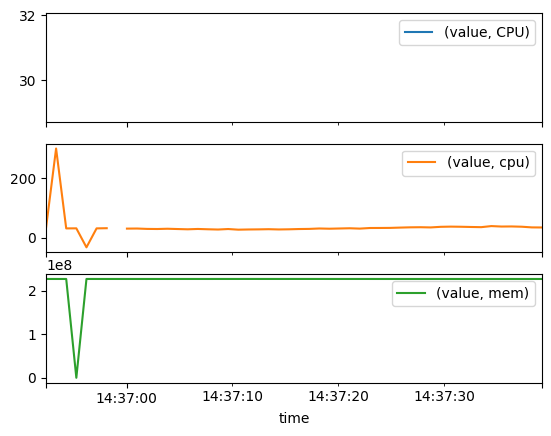

In [ ]:
# Let's plot the CPU column using pivot DataFrame to see if we can spot any bad values.
pd.pivot(df, index='time', columns='name').plot(subplots=True)

`If you know the range of valid values in your data, you can find out values that are outside of this range. `

Let's take a look at cpu, which is the load in percent. It should be between zero and hundred. So I'm going to run DataFrame query where the name is cpu and the value is either less than zero or bigger than a hundred. If you're going to run it, we are going to find two rows that are problematic. 

In [14]:
df.query('name == "cpu" & (value < 0 | value > 100)' )	

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


***Sometimes you're going to use more complex methods to find bad data. The standard score is a distance of a data point from the mean in units of standard deviation. It's a good way to find outliers in data that is normally distributed. You should know your data distribution characteristics.***

So let's have a look. We are going to get only the memory and calculate the z score, which is the distance from the mean, and get the bad values. To find the rows, we are going to use the DataFrame .loc with the index of the bad memory. And we found the one row with some bad data. 

In [15]:
mem = df[df['name'] == 'mem']['value']
z_score = (mem - mem.mean()) / mem.std()
bad_mem = mem [z_score.abs() > 2]

# bad_mem is the list of values that are more than 2 standard deviations away from the mean
df.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


There are even more sophisticated ways of detecting bad data. See **scikit-learn** section about ``Novelty`` and ``Outlier Detection`` if you want to go deeper.

**1.3. Duplicate values**

Duplicate data will make your calculations go wrong. Even worse, if you process the same transaction twice, you're going to lose a customer.

In [16]:
#library
import pandas as pd

Let's have a look at the shopping cart data. So we have date, name, amount, and price. Let's load it up. So we import pandas as pd. And now we're going to read the csv passing the date column as date. And you can see we have several columns like one and two, and four and five that looks the same.

In [19]:
# dataset
# dataset
df=pd.read_csv('cart2.csv', parse_dates=['date'])
df

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


Pandas come with a duplicated method. Let's run it. And you see it's going to catch only the last two. So five is a duplicate of four. If you look closely, you see that in rows one and two, the price is different, 1.70 and 1.20.

In [20]:
# find duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

By default, ***duplicated will consider values from all columns***, but you can tell it to look for a subset of columns. In database terms, we call this the key. So let's run again duplicated, this time looking only at the date and the name column. And now we've found that line two is also a duplicate of line one.

In [21]:
df.duplicated(['date', 'name'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool